Problem Statement -

Build your own recommendation system for products on an e-commerce website like Amazon.com.

Dataset Link -  https://drive.google.com/file/d/1ClBptsK3V5KgKXtK2GSRzFNAW7GnTPDW/view?usp=sharingLinks to an external site.

 

Dataset columns - first three columns are userId, productId, and ratings and the fourth column is timestamp. You can discard the timestamp column as in this case you may not need to use it.

Source - Amazon Reviews data (http://jmcauley.ucsd.edu/data/amazon/)  The repository has several datasets. For this case study, we are using the Electronics dataset


Read and explore the given dataset.  ( Rename column/add headers, plot histograms, find data characteristics)
Take a subset of the dataset to make it less sparse/ denser. ( For example, keep the users only who has given 50 or more number of ratings )
Split the data randomly into train and test dataset. ( For example, split it in 70/30 ratio)
Build Popularity Recommender model.
Build Collaborative Filtering model.
Evaluate both the models. ( Once the model is trained on the training data, it can be used to compute the error (like RMSE) on predictions made on the test data.) You can also use a different method to evaluate the models.
Get top - K ( K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits, we will recommend 5 new products.
Summarise your insights.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('ratings_Electronics.csv', names  = ['userId','productId','ratings','timestamp'])

In [3]:
df.drop(columns=['timestamp'], inplace = True)

In [4]:
df.head(3)

,userId,productId,ratings
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 3 columns):
userId       object
productId    object
ratings      float64
dtypes: float64(1), object(2)
memory usage: 179.1+ MB


In [6]:
# Subsetting the data frame for users having rating more then 50

In [7]:
r1 = pd.DataFrame(df.groupby('userId')['ratings'].count())
users_rat = pd.DataFrame(r1[(r1['ratings'] > 50)].sort_values(by = 'ratings', ascending = False))
ratings_df = pd.merge(users_rat , df[['userId','ratings','productId']], on = 'userId')
ratings_df.drop(columns=['ratings_x'], inplace = True)
ratings_df.rename(columns={'ratings_y':'ratings'},inplace = True)

In [8]:
ratings_df.head(5)

,userId,ratings,productId
0,A5JLAU2ARJ0BO,1.0,1400532655
1,A5JLAU2ARJ0BO,5.0,B00003006R
2,A5JLAU2ARJ0BO,3.0,B00003G1RG
3,A5JLAU2ARJ0BO,5.0,B00004S9AK
4,A5JLAU2ARJ0BO,4.0,B00004SB92


# Determine the ratings distribution using histogram:

- Maximum number of 5 ratings provided in the dataset

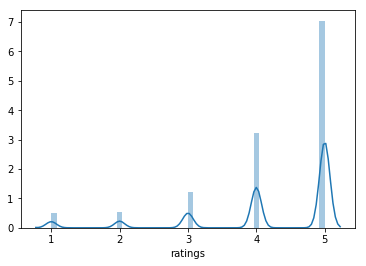

In [136]:
sns.distplot(ratings_df['ratings'],hist = True, kde = 'False')

In [143]:
# Find the Null Values if any in the Dataset:



In [150]:
ratings_df.isnull().sum()

userId       0
ratings      0
productId    0
dtype: int64

# Building Popularity Based Recommendation :

- Most rated Products in the dataset.

- Simple Popularity Based Recommendation



In [253]:
from sklearn.model_selection import train_test_split
import Evaluation as Evaluation

In [181]:
# Simple recommender engine on popularity based

In [180]:
ratings_df_grouped = ratings_df.groupby(['productId']).agg({'ratings': 'count'}).reset_index()
grouped_sum = ratings_df_grouped['ratings'].sum()
print(grouped_sum)
ratings_df_grouped['percentage']  = ratings_df['ratings'].div(grouped_sum)*100
ratings_df_grouped.sort_values(['ratings', 'productId'], ascending = [0,1], inplace= True)

122171


,productId,ratings,percentage
38146,B0088CJT4U,204,0.003274
24262,B003ES5ZUU,177,0.004093
10820,B000N99BBC,163,0.002456
37407,B007WTAJTO,156,0.004093
37765,B00829TIEK,146,0.004093
38471,B008DWCRQW,135,0.004093
37761,B00829THK0,132,0.004093
21486,B002R5AM7C,127,0.003274
28121,B004CLYEDC,117,0.004093
21708,B002SZEOLG,108,0.004093


In [185]:
#top 15 products.
ratings_df_grouped.head(15)

,productId,ratings,percentage
38146,B0088CJT4U,204,0.003274
24262,B003ES5ZUU,177,0.004093
10820,B000N99BBC,163,0.002456
37407,B007WTAJTO,156,0.004093
37765,B00829TIEK,146,0.004093
38471,B008DWCRQW,135,0.004093
37761,B00829THK0,132,0.004093
21486,B002R5AM7C,127,0.003274
28121,B004CLYEDC,117,0.004093
21708,B002SZEOLG,108,0.004093


In [186]:
# Creating Recommendation engine Rank and Score for User ID

In [187]:
trainset,testset = train_test_split(ratings_df, test_size = 0.2, random_state = 1234)

In [200]:
train_data_grouped = trainset.groupby(['productId']).agg({'userId': 'count'}).reset_index()
train_data_grouped.rename(columns = {'userId': 'score'},inplace=True)
train_data_sort = train_data_grouped.sort_values(['score', 'productId'], ascending = [0,1])
train_data_sort['Rank'] = train_data_sort['score'].rank(ascending=0, method='first')
popularity_recommendations = train_data_sort.head(10)

In [237]:
popularity_recommendations

,productId,score,Rank
33007,B0088CJT4U,166,1.0
20934,B003ES5ZUU,152,2.0
9303,B000N99BBC,135,3.0
32368,B007WTAJTO,123,4.0
32678,B00829TIEK,116,5.0
33285,B008DWCRQW,112,6.0
32674,B00829THK0,107,7.0
18504,B002R5AM7C,104,8.0
24283,B004CLYEDC,97,9.0
18698,B002SZEOLG,91,10.0


In [226]:
#Use the popularity based recommender system model to make recommendations

def recommend(userId):    
        user_recommendations = popularity_recommendations
        
        #Add user_id column for which the recommendations are being generated
        user_recommendations['userId'] = userId
    
        #Bring user_id column to the front
        cols = user_recommendations.columns.tolist()
        cols = cols[-1:] + cols[:-1]
        user_recommendations = user_recommendations[cols]
        
        return user_recommendations.iloc[:,0:3]

In [231]:
# Recommending to userid
recommend(10)

,userId,productId,score
33007,10,B0088CJT4U,166
20934,10,B003ES5ZUU,152
9303,10,B000N99BBC,135
32368,10,B007WTAJTO,123
32678,10,B00829TIEK,116
33285,10,B008DWCRQW,112
32674,10,B00829THK0,107
18504,10,B002R5AM7C,104
24283,10,B004CLYEDC,97
18698,10,B002SZEOLG,91


# Summary:
- In the above steps we created the Popularity Based Model using Rank and recommend function created above.

- We are recommending top 10 products to any new users which on the basis of the score and rank provided.

- score is calculated on the basis of users provided max ratings to product ids.

# Collaborative Filtering:

- EDA on DATA

- Using Surprise Package

In [14]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122171 entries, 0 to 122170
Data columns (total 3 columns):
userId       122171 non-null object
ratings      122171 non-null float64
productId    122171 non-null object
dtypes: float64(1), object(2)
memory usage: 3.7+ MB


In [15]:
ratings_df.head(5)

,userId,ratings,productId
0,A5JLAU2ARJ0BO,1.0,1400532655
1,A5JLAU2ARJ0BO,5.0,B00003006R
2,A5JLAU2ARJ0BO,3.0,B00003G1RG
3,A5JLAU2ARJ0BO,5.0,B00004S9AK
4,A5JLAU2ARJ0BO,4.0,B00004SB92


In [16]:
# find the most rated productid

In [17]:
ratings_df.groupby('productId')['ratings'].value_counts().sort_values(ascending = False).head(10)

productId   ratings
B003ES5ZUU  5.0        158
B000N99BBC  5.0        131
B007WTAJTO  5.0        128
B0088CJT4U  5.0         90
B00829TIEK  5.0         85
B002WE6D44  5.0         83
B004CLYEDC  5.0         81
B0019EHU8G  5.0         80
B0088CJT4U  4.0         80
B002V88HFE  5.0         79
Name: ratings, dtype: int64

In [18]:
# User with max number of ratings.

ratings_df.groupby('userId')['ratings'].value_counts().sort_values(ascending = False).head(10)

userId          ratings
A680RUE1FDO8B   5.0        296
A5JLAU2ARJ0BO   5.0        275
ADLVFFE4VBT8    5.0        271
A3OXHLG6DIBRW8  5.0        270
A2NOW4U7W3F7RI  5.0        245
A6FIAB28IS79    5.0        212
A25C2M3QF9G7OQ  5.0        211
A2NYK9KWFMJV4Y  5.0        209
A1CMD08Z49PGKQ  5.0        202
A2AY4YUOX2N1BQ  5.0        199
Name: ratings, dtype: int64

In [19]:
from surprise import Reader,Dataset
from surprise.model_selection import train_test_split

In [20]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122171 entries, 0 to 122170
Data columns (total 3 columns):
userId       122171 non-null object
ratings      122171 non-null float64
productId    122171 non-null object
dtypes: float64(1), object(2)
memory usage: 3.7+ MB


In [21]:
ratings_df.ratings = ratings_df.ratings.astype(str)

In [22]:
reader = Reader(rating_scale=(1,5))

In [23]:
# columns passed below must always be in order uid,itemid,ratings.
data = Dataset.load_from_df(ratings_df[['userId','productId','ratings']],reader = reader)

In [24]:
data

<surprise.dataset.DatasetAutoFolds instance at 0x00000000393C3A48>

In [25]:
# Divide into 70/30 ratio

In [26]:
trainset,testset = train_test_split(data,test_size=0.3,random_state= 1234)

In [27]:
trainset.to_raw_uid(0)
trainset.to_raw_iid(2)

'A3B20R4ZAH0Y2Y'

'B001MXON98'

In [28]:
from surprise import KNNWithMeans
from surprise import accuracy
from surprise import Prediction

In [29]:
# Creating user user based collaborative filtering model

In [30]:
model = KNNWithMeans(k = 51, sim_options= {'name':'cosine', 'user_based':True})

In [31]:
model.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [32]:
test_preds = model.test(testset)

In [33]:
test_preds[0:3]

[Prediction(uid='A1RPTVW5VEOSI', iid='B004OZMZKK', r_ui=4.0, est=4.262584922648768, details={u'reason': 'User and/or item is unkown.', u'was_impossible': True}),
 Prediction(uid='A35A2RWUMC737N', iid='B009AWA3VK', r_ui=5.0, est=4.105414273995078, details={u'actual_k': 1, u'was_impossible': False}),
 Prediction(uid='A1QNYLBG73QRNF', iid='B000V1VG5G', r_ui=4.0, est=4.832894736842105, details={u'actual_k': 1, u'was_impossible': False})]

In [34]:
accuracy.rmse(test_preds)

RMSE: 1.0586


1.0586311621600617

In [35]:
# converting predictions back into Dataframe

In [36]:
Predictions = pd.DataFrame(test_preds)
Predictions["was_impossible"] = [x["was_impossible"] for x in Predictions["details"]]

In [37]:
Predictions[Predictions.was_impossible == False]

,uid,iid,r_ui,est,details,was_impossible
1,A35A2RWUMC737N,B009AWA3VK,5.0,4.105414,"{u'actual_k': 1, u'was_impossible': False}",False
2,A1QNYLBG73QRNF,B000V1VG5G,4.0,4.832895,"{u'actual_k': 1, u'was_impossible': False}",False
5,A7EU2BWLLCJY2,B005TDWU24,3.0,4.857143,"{u'actual_k': 1, u'was_impossible': False}",False
6,A3Q4TYJVAM4IRM,B007R67FNA,5.0,4.097744,"{u'actual_k': 1, u'was_impossible': False}",False
8,A3V5F050GVZ56Q,B008EQYRRY,5.0,5.000000,"{u'actual_k': 12, u'was_impossible': False}",False
9,A1QVFHPY8418HC,B00005NIMJ,5.0,5.000000,"{u'actual_k': 3, u'was_impossible': False}",False
10,AUITG1DJ3QUGK,B00008I8OP,4.0,5.000000,"{u'actual_k': 1, u'was_impossible': False}",False
11,AG0PM9IAHQ06C,B000V0GXR8,5.0,4.210526,"{u'actual_k': 0, u'was_impossible': False}",False
12,A1P3DDFL423B3C,B000E5GKW8,4.0,3.780488,"{u'actual_k': 0, u'was_impossible': False}",False
13,A3LGT6UZL99IW1,B008HK50ZA,5.0,4.160804,"{u'actual_k': 0, u'was_impossible': False}",False


In [38]:
# Make Prediction for single User

In [39]:
model.predict(uid  = 'A22MANL4US4RMY', iid = 'B00FF8ZRR8')

Prediction(uid='A22MANL4US4RMY', iid='B00FF8ZRR8', r_ui=None, est=5, details={u'actual_k': 1, u'was_impossible': False})

In [40]:
# Creating top 5 recommendations

In [41]:
Predictions.head(3)

,uid,iid,r_ui,est,details,was_impossible
0,A1RPTVW5VEOSI,B004OZMZKK,4.0,4.262585,"{u'reason': u'User and/or item is unkown.', u'...",True
1,A35A2RWUMC737N,B009AWA3VK,5.0,4.105414,"{u'actual_k': 1, u'was_impossible': False}",False
2,A1QNYLBG73QRNF,B000V1VG5G,4.0,4.832895,"{u'actual_k': 1, u'was_impossible': False}",False


In [42]:
predictions_df = Predictions.drop(columns=['r_ui','details','was_impossible'])

In [43]:
predictions_df.head(3)

,uid,iid,est
0,A1RPTVW5VEOSI,B004OZMZKK,4.262585
1,A35A2RWUMC737N,B009AWA3VK,4.105414
2,A1QNYLBG73QRNF,B000V1VG5G,4.832895


In [44]:
predictions_df.sort_values(by = ["uid", "est"],ascending=False,inplace=True)

In [45]:
top_5_recommendation = predictions_df.groupby('uid').head(5)

In [46]:
# Let us recommend top 5 items for user id = AZOK5STV85FBJ

In [47]:
top_5_recommendation[top_5_recommendation.uid == 'AZOK5STV85FBJ']

,uid,iid,est
29848,AZOK5STV85FBJ,B00104XCVO,5.000000
2204,AZOK5STV85FBJ,B000HWVOFQ,4.682927
6625,AZOK5STV85FBJ,B00003006E,4.682927
7715,AZOK5STV85FBJ,B000GL3MOY,4.682927
8287,AZOK5STV85FBJ,B006MPRFJQ,4.682927


# Creating recommendation using SVD Approach

- Using SVD Approach in Surprise Package.
- SVD generates two lower rank matrices: User Feature Matri
SVD will find the hidden facorts (latent factors) to find the similarity between Item Item. It will work even for the not corated pairs


In [48]:
from surprise import SVD
from surprise import accuracy

In [49]:
svd_model = SVD(n_factors=20,biased=False)

In [50]:
svd_model.fit(trainset)

In [51]:
test_preds_sv = svd_model.test(testset)

In [52]:
test_preds_sv

[Prediction(uid='A1RPTVW5VEOSI', iid='B004OZMZKK', r_ui=4.0, est=4.262584922648768, details={u'reason': 'User and item are unkown.', u'was_impossible': True}),
 Prediction(uid='A35A2RWUMC737N', iid='B009AWA3VK', r_ui=5.0, est=1.1595033795632432, details={u'was_impossible': False}),
 Prediction(uid='A1QNYLBG73QRNF', iid='B000V1VG5G', r_ui=4.0, est=3.210838587313357, details={u'was_impossible': False}),
 Prediction(uid='A111WCUF5KA2I6', iid='B00BYRJXGA', r_ui=5.0, est=4.262584922648768, details={u'reason': 'User and item are unkown.', u'was_impossible': True}),
 Prediction(uid='A198CCH4NNLI2E', iid='B001R4BBLU', r_ui=1.0, est=4.262584922648768, details={u'reason': 'User and item are unkown.', u'was_impossible': True}),
 Prediction(uid='A7EU2BWLLCJY2', iid='B005TDWU24', r_ui=3.0, est=4.875845171795611, details={u'was_impossible': False}),
 Prediction(uid='A3Q4TYJVAM4IRM', iid='B007R67FNA', r_ui=5.0, est=3.9838555032870273, details={u'was_impossible': False}),
 Prediction(uid='AT09WGFUM934

In [53]:
svd_model.predict(uid  = 'A22MANL4US4RMY', iid = 'B00FF8ZRR8')

Prediction(uid='A22MANL4US4RMY', iid='B00FF8ZRR8', r_ui=None, est=4.068286460221609, details={u'was_impossible': False})

In [54]:
Predictions_SVD = pd.DataFrame(test_preds_sv)
Predictions_SVD['was_impossible'] = [x['was_impossible'] for x in Predictions_SVD['details']]

In [55]:
Predictions_SVD

,uid,iid,r_ui,est,details,was_impossible
0,A1RPTVW5VEOSI,B004OZMZKK,4.0,4.262585,"{u'reason': u'User and item are unkown.', u'wa...",True
1,A35A2RWUMC737N,B009AWA3VK,5.0,1.159503,{u'was_impossible': False},False
2,A1QNYLBG73QRNF,B000V1VG5G,4.0,3.210839,{u'was_impossible': False},False
3,A111WCUF5KA2I6,B00BYRJXGA,5.0,4.262585,"{u'reason': u'User and item are unkown.', u'wa...",True
4,A198CCH4NNLI2E,B001R4BBLU,1.0,4.262585,"{u'reason': u'User and item are unkown.', u'wa...",True
5,A7EU2BWLLCJY2,B005TDWU24,3.0,4.875845,{u'was_impossible': False},False
6,A3Q4TYJVAM4IRM,B007R67FNA,5.0,3.983856,{u'was_impossible': False},False
7,AT09WGFUM934H,B007XACV8O,5.0,4.262585,"{u'reason': u'User and item are unkown.', u'wa...",True
8,A3V5F050GVZ56Q,B008EQYRRY,5.0,3.919105,{u'was_impossible': False},False
9,A1QVFHPY8418HC,B00005NIMJ,5.0,3.070331,{u'was_impossible': False},False


In [56]:
Predictions_SVD[Predictions_SVD.uid =='AZOK5STV85FBJ']

,uid,iid,r_ui,est,details,was_impossible
198,AZOK5STV85FBJ,B003B01AHS,5.0,4.262585,"{u'reason': u'User and item are unkown.', u'wa...",True
2204,AZOK5STV85FBJ,B000HWVOFQ,5.0,1.000000,{u'was_impossible': False},False
4272,AZOK5STV85FBJ,B00JG5VV9O,4.0,4.262585,"{u'reason': u'User and item are unkown.', u'wa...",True
6625,AZOK5STV85FBJ,B00003006E,5.0,1.829612,{u'was_impossible': False},False
7715,AZOK5STV85FBJ,B000GL3MOY,5.0,1.000000,{u'was_impossible': False},False
8287,AZOK5STV85FBJ,B006MPRFJQ,4.0,1.809200,{u'was_impossible': False},False
9154,AZOK5STV85FBJ,B001JT0CGI,5.0,1.000000,{u'was_impossible': False},False
16147,AZOK5STV85FBJ,B000E922SA,5.0,4.262585,"{u'reason': u'User and item are unkown.', u'wa...",True
18840,AZOK5STV85FBJ,B000L1AUH6,5.0,4.262585,"{u'reason': u'User and item are unkown.', u'wa...",True
19375,AZOK5STV85FBJ,B000XZ1AY2,5.0,1.000000,{u'was_impossible': False},False


In [58]:
accuracy.rmse(test_preds_sv)

RMSE: 1.8564


1.8564045640455542

In [59]:
Predictions_SVD_rec = Predictions_SVD.drop(columns=['r_ui','details','was_impossible'])

In [63]:
Predictions_SVD_rec.head(5)

,uid,iid,est
0,A1RPTVW5VEOSI,B004OZMZKK,4.262585
1,A35A2RWUMC737N,B009AWA3VK,1.159503
2,A1QNYLBG73QRNF,B000V1VG5G,3.210839
3,A111WCUF5KA2I6,B00BYRJXGA,4.262585
4,A198CCH4NNLI2E,B001R4BBLU,4.262585


In [65]:
Predictions_SVD_rec.sort_values(by = ['uid','est'], ascending = False,inplace = True)

In [66]:
top_5_recommendation = Predictions_SVD_rec.groupby('uid').head(5)

In [68]:
top_5_recommendation.head(5)

,uid,iid,est
198,AZOK5STV85FBJ,B003B01AHS,4.262585
4272,AZOK5STV85FBJ,B00JG5VV9O,4.262585
16147,AZOK5STV85FBJ,B000E922SA,4.262585
18840,AZOK5STV85FBJ,B000L1AUH6,4.262585
25484,AZOK5STV85FBJ,B000093S2G,4.262585


- Create top 5 recommendations for user id = AZOK5STV85FBJ

In [69]:
top_5_recommendation[top_5_recommendation.uid == 'AZOK5STV85FBJ']

,uid,iid,est
198,AZOK5STV85FBJ,B003B01AHS,4.262585
4272,AZOK5STV85FBJ,B00JG5VV9O,4.262585
16147,AZOK5STV85FBJ,B000E922SA,4.262585
18840,AZOK5STV85FBJ,B000L1AUH6,4.262585
25484,AZOK5STV85FBJ,B000093S2G,4.262585


# Insights

- RMSE for SVD Model is higher as we can see from the above w.r.t the KNNwithMeans.
- For same user Id different ratings and products suggested by both the models.
- However SVD is looking at an approach where it is breaking into 3 matrices User Feature, Singular value and Item Feature.

Let us tune the hyper paramaters of the SVD Model and see if we can reduce error here.

In [72]:
from surprise.model_selection import GridSearchCV, cross_validate
from surprise import SVD

In [66]:
param_grid = {'lr_all' : [0.001,0.01,0.05], 'reg_all':[0.1,0.4]}
gs = GridSearchCV(SVD,param_grid, measures = ['rmse', 'mae'], cv = 3)


In [77]:
gs.fit(data)

In [69]:
gs.best_params

{'rmse': {'lr_all': 0.01, 'reg_all': 0.1},
 'mae': {'lr_all': 0.01, 'reg_all': 0.1}}

In [78]:
model_SVD_1 = SVD(lr_all = 0.01, reg_all = 0.1)

In [80]:
score = cross_validate(model_SVD_1,data,verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9744  0.9816  0.9731  0.9750  0.9817  0.9772  0.0037  
MAE (testset)     0.7206  0.7246  0.7203  0.7190  0.7261  0.7221  0.0027  
Fit time          7.76    7.71    7.92    7.76    7.92    7.82    0.09    
Test time         0.19    0.19    0.18    0.19    0.19    0.19    0.00    


# This shows the performance of our Model using Grid Search on 5 folds. It shows how it will perform in Production when deployed.